# Ensemble Vis


meeting with Ryan
- Joy Division plots over data samples
- How many classifiers predict each class
- Do interpolating models concentrate?
- Start with ResNet CIFAR-10

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from glob import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

# Look at the models

In [4]:
!ls saved_models/ResNet18_checkpoints/*/*/*/*

saved_models/ResNet18_checkpoints/different_knobs_subset_01/bs_1024/normal/ResNet18_w128:
log_0.txt                         net_exp_1_early_stopped_model.pkl
log_1.txt                         net_exp_2.pkl
log_2.txt                         net_exp_2_best.pkl
log_3.txt                         net_exp_2_early_stopped_model.pkl
log_4.txt                         net_exp_3.pkl
metrics                           net_exp_3_best.pkl
net_exp_0.pkl                     net_exp_3_early_stopped_model.pkl
net_exp_0_best.pkl                net_exp_4.pkl
net_exp_0_early_stopped_model.pkl net_exp_4_best.pkl
net_exp_1.pkl                     net_exp_4_early_stopped_model.pkl
net_exp_1_best.pkl

saved_models/ResNet18_checkpoints/different_knobs_subset_01/bs_1024/normal/ResNet18_w2:
log_0.txt          log_4.txt          net_exp_1.pkl      net_exp_3.pkl
log_1.txt          metrics            net_exp_1_best.pkl net_exp_3_best.pkl
log_2.txt          net_exp_0.pkl      net_exp_2.pkl      net_exp_4.pkl
log_3.txt

# Load predictions

In [5]:
!ls saved_models/ResNet18_checkpoints/different_knobs_subset_01/bs_1024/normal/ResNet18_w128/metrics

CKA_mixup_alpha_16.0.err               hessian.pkl
CKA_mixup_alpha_16.0.log               hessian_test.err
CKA_mixup_alpha_16.0.pkl               hessian_test.log
CKA_mixup_alpha_16.0_repeat_10.err     hessian_test.pkl
CKA_mixup_alpha_16.0_repeat_10.log     loss_acc.err
CKA_mixup_alpha_16.0_repeat_10.pkl     loss_acc.log
agreement_mixup_alpha_16.0.pkl         loss_acc.pkl
agreement_test.pkl                     loss_acc_test.err
curve_test.npz                         loss_acc_test.log
ensemble_average_predictions_test.pkl  loss_acc_test.pkl
ensemble_average_predictions_train.pkl loss_acc_test_half.pkl
ensemble_predictions.pkl               loss_acc_val_half.pkl
ensemble_predictions_test.pkl          model_dist.pkl
ensemble_predictions_train.pkl         parameters_count.pkl
hessian.log


# load Taxonomy `.pkl`

In [6]:
import pickle
# file_name = "./saved_models/ResNet18_checkpoints/different_knobs_subset_01/bs_1024/normal/ResNet18_w128/metrics/ensemble_predictions_test.pkl"
file_name = "./saved_models/ResNet18_checkpoints/different_knobs_subset_10/bs_1024/normal/ResNet18_w128/metrics/ensemble_predictions_test.pkl"
with open(file_name, 'rb') as f:
    results = pickle.load(f)

    
print(f"len(results) = {len(results)}")
print(f"results[0].keys() = {results[0].keys()}")
print(f"len(results[0]['predictions'][0]) = {len(results[0]['predictions'][0])}")

len(results) = 5
results[0].keys() = dict_keys(['predictions', 'probabilities', 'targets', 'correct', 'accuracy'])
len(results[0]['predictions'][0]) = 1024


In [7]:
results[0]['probabilities']

[array([[-1.1709762 , -1.1238506 , -1.3466846 , ..., -1.4670184 ,
         -0.8178502 , -1.3607907 ],
        [ 0.20490079,  0.7779454 , -1.6396779 , ..., -1.6569304 ,
          8.550311  , -1.032992  ],
        [ 0.16182585,  1.8297538 , -1.4389101 , ..., -1.2204955 ,
          5.9368963 , -0.35125488],
        ...,
        [-0.45853487,  7.6381316 , -0.87869763, ..., -1.3497783 ,
         -0.92658454, -1.1953541 ],
        [ 7.822773  , -1.2137579 , -0.97901434, ..., -1.3336315 ,
          1.7247636 , -1.3797821 ],
        [ 7.6697893 , -1.063623  ,  1.9239916 , ..., -0.9902485 ,
         -0.7778416 , -1.5440652 ]], dtype=float32)]

In [8]:
for model_index in range(5):
    print(' '.join(list(map(str, results[model_index]['predictions'][0].ravel().tolist()[:40]))))

3 8 8 0 6 6 1 4 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 2 4 0 9 6 6 5 4 3 9 8 4 9 9 5
3 8 1 0 6 6 9 6 3 9 0 9 5 7 9 6 5 7 8 6 7 0 4 9 4 2 4 0 9 6 6 5 4 4 9 9 7 9 9 5
3 8 8 0 6 6 1 7 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 3 4 0 9 6 6 5 4 5 9 8 4 9 9 5
3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 3 2 0 9 6 6 5 4 3 9 8 4 1 9 5
3 8 8 0 6 6 1 6 3 1 3 9 5 7 9 8 5 7 8 6 7 0 4 9 4 2 4 0 9 6 6 5 4 5 9 8 4 1 9 5


In [9]:
for model_index in range(5):
    print(' '.join(list(map(str, results[model_index]['predictions'][0].ravel().tolist()[:40]))))

3 8 8 0 6 6 1 4 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 2 4 0 9 6 6 5 4 3 9 8 4 9 9 5
3 8 1 0 6 6 9 6 3 9 0 9 5 7 9 6 5 7 8 6 7 0 4 9 4 2 4 0 9 6 6 5 4 4 9 9 7 9 9 5
3 8 8 0 6 6 1 7 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 3 4 0 9 6 6 5 4 5 9 8 4 9 9 5
3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 4 3 2 0 9 6 6 5 4 3 9 8 4 1 9 5
3 8 8 0 6 6 1 6 3 1 3 9 5 7 9 8 5 7 8 6 7 0 4 9 4 2 4 0 9 6 6 5 4 5 9 8 4 1 9 5


In [79]:
np.ravel(results[model_index]['correct'])


array([604])

## process Taxonomy `.pkl` result

In [10]:
import pickle


# for loop over bs, width
batch_sizes = [16, 1024]
widths = [2, 128]
train_or_test = "test"


# initialize dataframe
df_results = pd.DataFrame()


# loop over hyperparameters
for batch_size in batch_sizes:
    for width in widths:

        # file_name = f"./saved_models/ResNet18_checkpoints/different_knobs_subset_01/bs_{batch_size}/normal/ResNet18_w{width}/metrics/ensemble_predictions_{train_or_test}.pkl"
        file_name = f"./saved_models/ResNet18_checkpoints/different_knobs_subset_10/bs_{batch_size}/normal/ResNet18_w{width}/metrics/ensemble_predictions_{train_or_test}.pkl"
        with open(file_name, 'rb') as f:
            results = pickle.load(f)

        for model_index in range(5):

            pred = np.ravel(results[model_index]['predictions'])
            targ = np.ravel(results[model_index]['targets'])
    
            sorted_index = np.argsort(targ)
            
            df_model = pd.DataFrame()
            df_model = df_model.assign(prediction = pred[sorted_index])
            df_model = df_model.assign(target = targ[sorted_index])
            df_model = df_model.assign(sample_index = np.arange(len(targ)))
            df_model = df_model.assign(sample_index_original = sorted_index)

            df_model = df_model.assign(model_index = model_index)
            df_model = df_model.assign(batch_size = batch_size)
            df_model = df_model.assign(width = width)

            df_results = pd.concat([df_results, df_model], ignore_index=True, axis=0)


# show df
df_results

,prediction,target,sample_index,sample_index_original,model_index,batch_size,width
0,0,0,0,1023,0,16,2
1,7,0,1,237,0,16,2
2,0,0,2,489,0,16,2
3,6,0,3,125,0,16,2
4,0,0,4,822,0,16,2
...,...,...,...,...,...,...,...
20475,9,9,1019,554,4,1024,128
20476,9,9,1020,545,4,1024,128
20477,9,9,1021,538,4,1024,128
20478,9,9,1022,577,4,1024,128


## load dataframe

In [12]:
np.random.seed(0)

df = df_results.copy()
df = df.loc[df.batch_size.isin([1024]) & df.width.isin([128])]
df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, 20))]
df

,prediction,target,sample_index,sample_index_original,model_index,batch_size,width
15369,0,0,9,297,0,1024,128
15447,0,0,87,929,0,1024,128
15475,1,1,115,978,0,1024,128
15534,1,1,174,66,0,1024,128
15552,1,1,192,947,0,1024,128
...,...,...,...,...,...,...,...
20219,7,7,763,521,4,1024,128
20291,8,8,835,495,4,1024,128
20301,8,8,845,337,4,1024,128
20305,8,8,849,852,4,1024,128


## ploy Joy Division style plot

/Users/calebgeniesse/miniconda3/lib/python3.10/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/calebgeniesse/miniconda3/lib/python3.10/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (1) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/calebgeniesse/miniconda3/lib/python3.10/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (5) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "
/Users/calebgeniesse/miniconda3/lib/python3.10/site-packages/

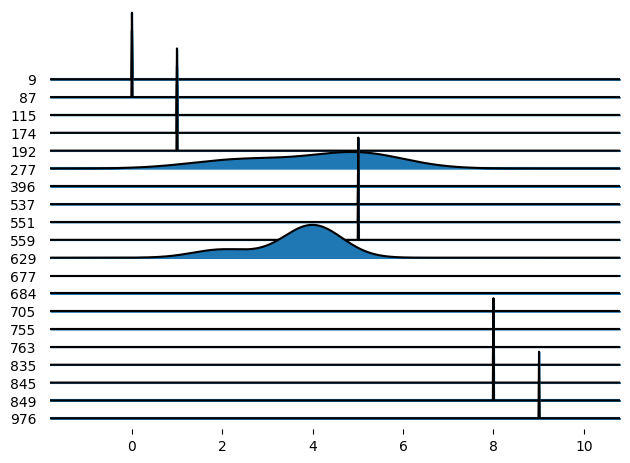

In [13]:

fig, axes = joypy.joyplot(df, by="sample_index", column="prediction")

<Axes: xlabel='prediction', ylabel='Density'>

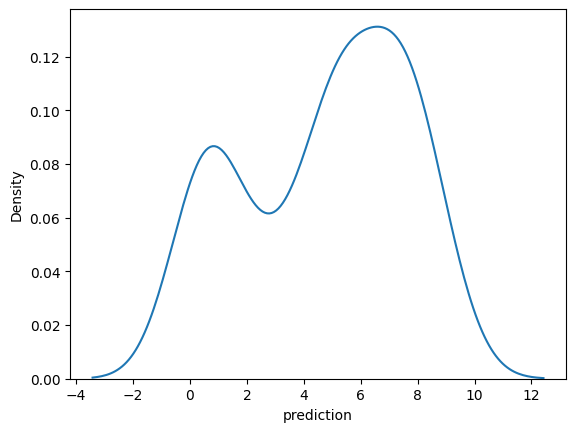

In [14]:
sns.kdeplot(df, x="prediction")

In [226]:
372 - 672

-300

## ploy Joy Division style plot

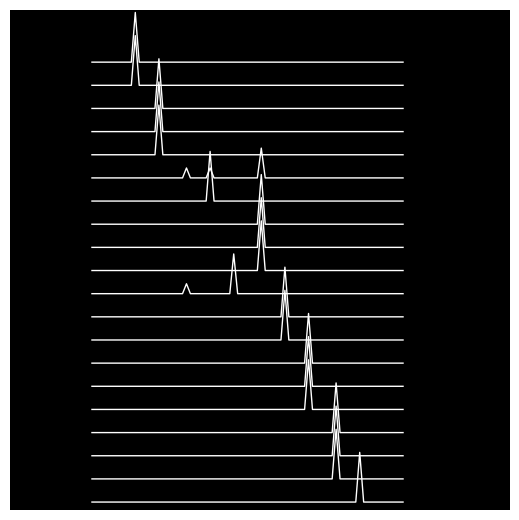

In [15]:
%matplotlib inline

labels = df.target.tolist()
fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                        fill=False, background='k', linecolor="w", linewidth=1, 
                        grid="y", ylabels=False, xlabels=False, 
                        legend=False, overlap=0.5, figsize=(5,5), kind="counts", bins=80)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    a.set_xlim([-5,15])   

## multiple plots


batch_size=16, width=2


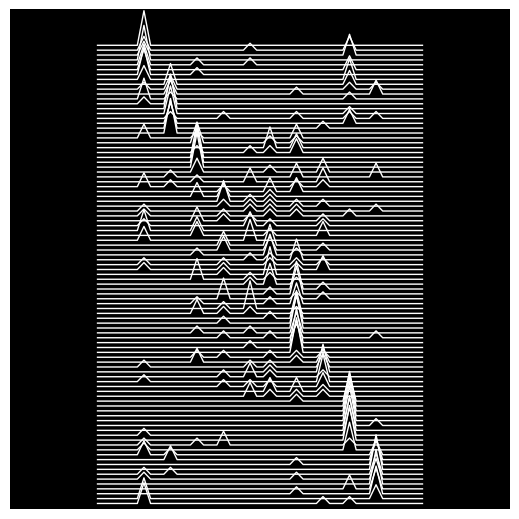

batch_size=1024, width=2


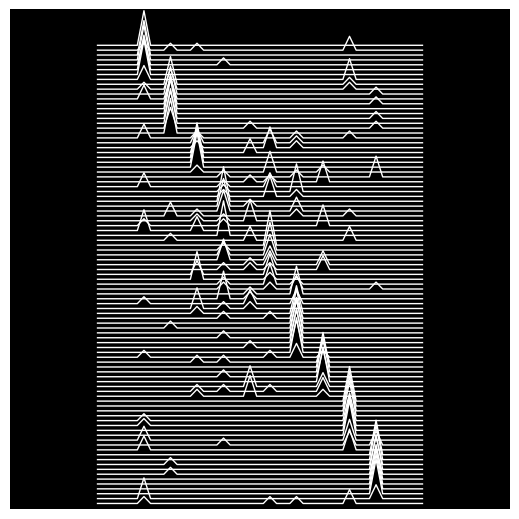

batch_size=16, width=128


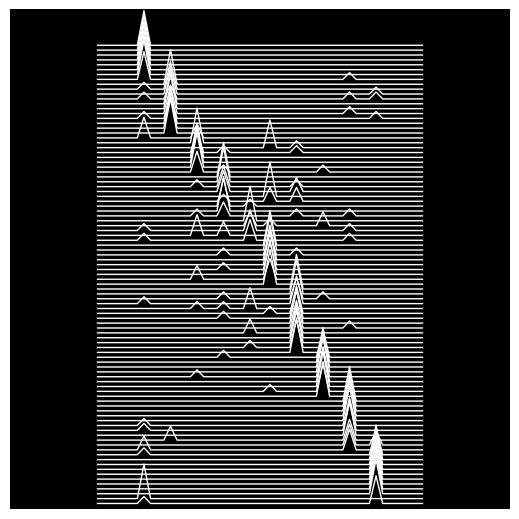

batch_size=1024, width=128


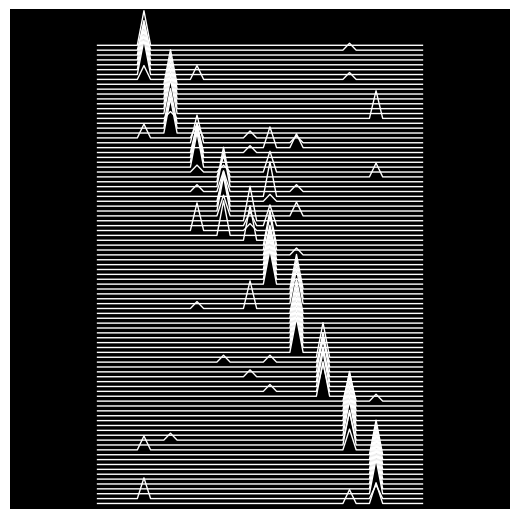

In [16]:
%matplotlib inline

for width in widths:
    for batch_size in batch_sizes:
        
        print(f"batch_size={batch_size}, width={width}")
        
        # extract results
        np.random.seed(0)

        df = df_results.copy()
        df = df.loc[df.batch_size.isin([batch_size]) & df.width.isin([width])]
        df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, 100))]
        #df = df.sort_values(["target"]) #, "sample_index", "model_index"])
        #df = df.reset_index(drop=True)
        
        # plot results
        labels = df.target.tolist()
        fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                                fill=False, background='k', linecolor="w", linewidth=1, 
                                grid="y", ylabels=False, xlabels=False, 
                                legend=False, overlap=0.5, figsize=(5,5), 
                                kind="counts", bins=50
                                )

        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
        for a in axes[:-1]:
            a.set_xlim([-5,14])   
        plt.show()
        
        

In [264]:
df.sort_values(["target"])

,prediction,target,sample_index,model_index,batch_size,width
15540,3,0,180,0,1024,128
16134,2,0,774,0,1024,128
20219,0,0,763,4,1024,128
19195,0,0,763,3,1024,128
18171,0,0,763,2,1024,128
...,...,...,...,...,...,...
17791,9,9,383,2,1024,128
18815,8,9,383,3,1024,128
19839,8,9,383,4,1024,128
19607,9,9,151,4,1024,128


batch_size=16, width=2


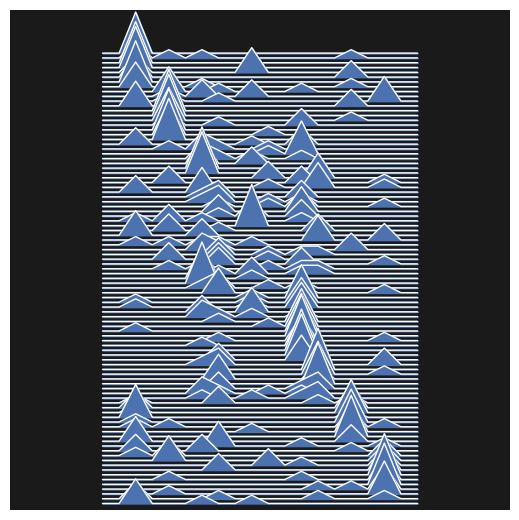

batch_size=1024, width=2


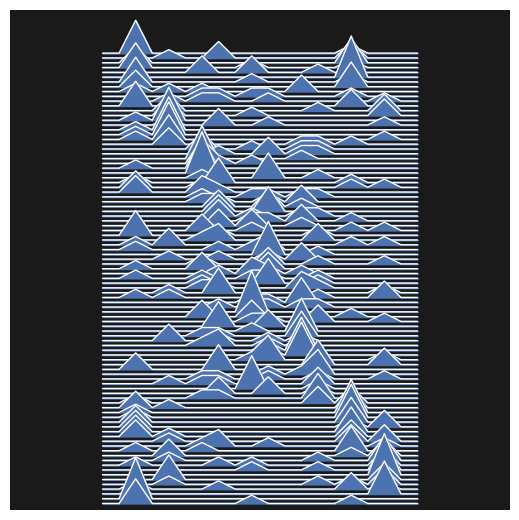

batch_size=16, width=128


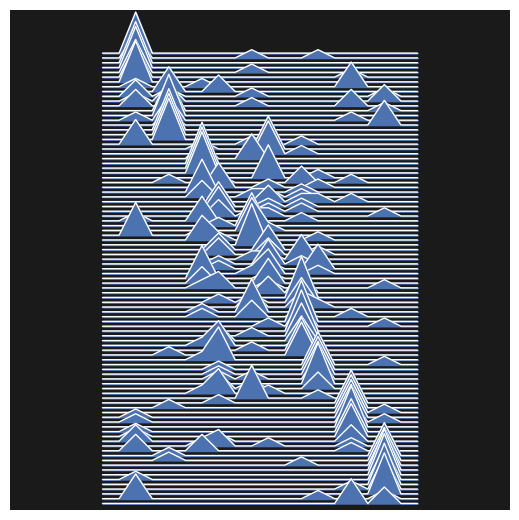

batch_size=1024, width=128


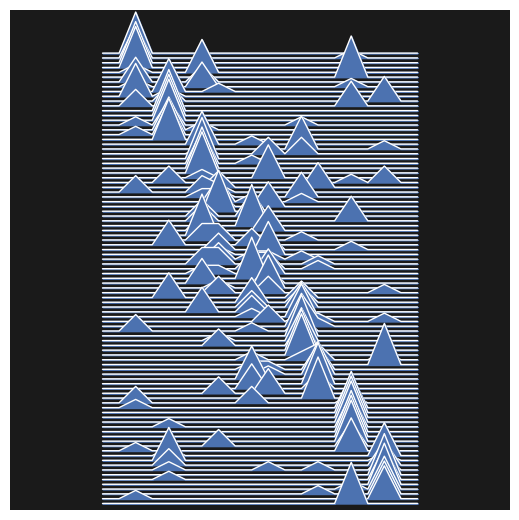

In [295]:
%matplotlib inline

for width in widths:
    for batch_size in batch_sizes:
        
        print(f"batch_size={batch_size}, width={width}")
        
        # extract results
        np.random.seed(0)

        df = df_results.copy()
        df = df.loc[df.batch_size.isin([batch_size]) & df.width.isin([width])]
        df = df.loc[df.sample_index.isin(np.random.choice(df.sample_index, 100))]
        #df = df.sort_values(["target"]) #, "sample_index", "model_index"])
        #df = df.reset_index(drop=True)
        
        # plot results
        labels = df.target.tolist()
        fig, axes = joypy.joyplot(df, by="sample_index", column="prediction", 
                                fill=True, background='k', linecolor="w", linewidth=1, 
                                grid="y", ylabels=False, xlabels=False, 
                                legend=False, overlap=0.5, figsize=(5,5), 
                                kind="counts", bins=20
                                )

        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
        for a in axes[:-1]:
            a.set_xlim([-5,14])   
        plt.show()
        
        